In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

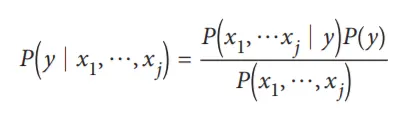

In [7]:
df = pd.read_csv("D:\coding\Machine-Learning\datasets\wheatherDataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4652\3470183994.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("D:\coding\Machine-Learning\datasets\wheatherDataset.csv")


,outlook,temp,humidity,windy,play
0,rainy,hot,high,f,no
1,rainy,hot,high,t,no
2,overcast,hot,high,f,yes
3,sunny,mild,high,f,yes
4,sunny,cool,normal,f,yes


In [8]:
def data(df):
    X = df.drop(columns=['play'])
    y = df.drop(columns=['outlook', 'temp', 'humidity', 'windy'])

    return X, y
df = pd.read_csv("D:\coding\Machine-Learning\datasets\wheatherDataset.csv")

X, y = data(df)


<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4652\3924439285.py:6: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("D:\coding\Machine-Learning\datasets\wheatherDataset.csv")


In [ ]:
class NaiveBayesClassifier:
    def __init__(self):
        self.likelihoods = {}
        self.class_priors = {}
        self.pred_priors = {}
        self.features = list
        self.X_train = np.array
        self.y_train = np.array
        self.train_size = int
        self.num_features = int


    def fit(self, X, y):
        self.features = list(X.columns)
        self.X_train = X
        self.y_train = y
        self.train_size = X.shape[0]
        self.num_features = X.shape[1]

        for feature in self.features:
            self.likelihoods[feature] = {}
            self.pred_priors[feature] = {}

            for feature_val in np.unique(self.X_train[feature]):
                self.pred_priors[feature].update({feature_val: 0})

                for outcome in np.unique(self.y_train):
                    self.likelihoods[feature].update({feature_val+'-'+outcome:0})
                    self.class_priors.update({outcome:0 })

        self.calculate_class_prior()
        self.calculate_likelihoods()
        self.calculate_predictor_prior()

    def calculate_class_prior(self):
        for outcome in np.unique(self.y_train):
            outcome_count = sum(self.y_train == outcome)
            self.class_prior[outcome] = outcome_count / self.train_size


    def calculate_likelihoods(self):
        for feature in self.features:
            for outcome in np.unique(self.y_train):
                outcome_count = sum(self.y_train == outcome)
                feature_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

                for feat_val, count in feature_likelihood.items():
                    self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count

    def calculate_predictor_prior(self):
        for feature in self.features:
            feature_vals = self.X_train[feature].value_counts().to_dict()

            for feature_val, count in feature_vals.items():
                 self.pred_priors[feature][feature_val] = count/self.train_size\
                 

    def predict(self, X):
	    results = []
        X = np.array(X)

        for query in X:
                probs_outcome = {}
                for outcome in np.unique(self.y_train):
                    prior = self.class_priors[outcome]
                    likelihood = 1
                    evidence = 1

                    for feat, feature_val in zip(self.features, query):
                        likelihood *= self.likelihoods[feat][feature_val + '-' + outcome]
                        evidence *= self.pred_priors[feat][feature_val]

                    posterior = (likelihood * prior) / (evidence)

                    probs_outcome[outcome] = posterior

                result = max(probs_outcome, key = lambda x: probs_outcome[x])
                results.append(result)

            return np.array(results)

			

if __name__ == "__main__":

	print("\nWeather Dataset:")

	df = pd.read_csv("D:\coding\Machine-Learning\datasets\wheatherDataset.csv")
	#print(df)

	X,y  = data(df)

	nb_clf = NaiveBayesClassifier()
	nb_clf.fit(X, y)

	#("Train Accuracy: {}".format(accuracy_score(y, nb_clf.predict(X))))

	query = np.array([['Rainy','Mild', 'Normal', 't']])
	print("Query 1:- {} ---> {}".format(query, nb_clf.predict(query)))

	query = np.array([['Overcast','Cool', 'Normal', 't']])
	print("Query 2:- {} ---> {}".format(query, nb_clf.predict(query)))

	query = np.array([['Sunny','Hot', 'High', 't']])
	print("Query 3:- {} ---> {}".format(query, nb_clf.predict(query)))
    